<a href="https://colab.research.google.com/github/dilipkumar08/python/blob/main/Pytorch/Pretrained_models/Resnet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
## Image processing with pytorch pretrained model

In [1]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models import resnet101
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

#dir(torchvision.models)



In [3]:
resnet=resnet101(pretrained=True)
resnet.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
uploaded=files.upload()
img=Image.open(list(uploaded.keys())[0])
print(img)

Saving Designer(1).jpeg to Designer(1).jpeg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7AAC62028A90>


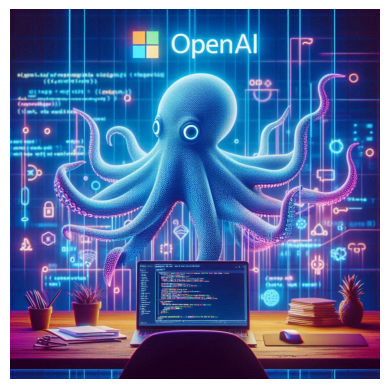

In [22]:
plt.imshow(img);
plt.axis('off');

In [23]:
preprocess=transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225])
     ]
  )

In [24]:
img_t=preprocess(img)
print(img_t)
batch_t=torch.unsqueeze(img_t,0)
print(batch_t.shape)

tensor([[[-1.6555, -1.6384, -1.6384,  ..., -1.4843, -1.4843, -1.4843],
         [-1.6384, -1.6213, -1.6213,  ..., -1.4843, -1.4843, -1.4843],
         [-1.6555, -1.6555, -1.6555,  ..., -1.5699, -1.5528, -1.5528],
         ...,
         [ 0.0569,  0.0912,  0.1083,  ...,  0.4851,  0.4851,  0.4851],
         [-0.2513, -0.2342, -0.2171,  ...,  0.2967,  0.2967,  0.3481],
         [ 0.1083,  0.1083,  0.0912,  ...,  0.2796,  0.2796,  0.3481]],

        [[-1.6681, -1.6155, -1.6681,  ..., -1.6856, -1.6681, -1.6681],
         [-1.6856, -1.6331, -1.6856,  ..., -1.6856, -1.6681, -1.6681],
         [-1.6856, -1.6506, -1.6856,  ..., -1.6681, -1.6506, -1.6331],
         ...,
         [-1.7731, -1.7556, -1.7381,  ..., -1.5105, -1.5455, -1.5455],
         [-1.7906, -1.7731, -1.7381,  ..., -1.5980, -1.6331, -1.6856],
         [-1.7731, -1.7556, -1.7031,  ..., -1.5630, -1.6155, -1.6681]],

        [[-0.6715, -0.5495, -0.5844,  ..., -0.6193, -0.6367, -0.6541],
         [-0.6890, -0.5844, -0.6193,  ..., -0

In [25]:
out=resnet(batch_t)
print(out)

tensor([[-3.5001e+00,  3.5189e-01, -1.6137e+00, -6.4608e-01, -2.6050e-01,
          2.3648e+00, -1.0509e+00, -1.1957e+00, -3.1802e+00, -2.7645e+00,
         -4.5696e+00, -2.4891e+00, -1.7067e+00, -3.5441e+00, -1.4840e+00,
         -9.0572e-01, -3.7351e+00, -2.8669e+00, -3.9283e+00, -3.8289e+00,
         -4.1795e+00, -2.9311e+00, -3.7231e-01, -2.2905e+00, -2.4635e+00,
         -4.9076e+00, -3.5543e+00, -2.6257e+00, -2.5207e+00,  1.9871e+00,
         -1.8846e+00, -2.8993e+00, -1.3262e+00, -6.7395e-01,  1.3237e-02,
         -3.9844e+00, -1.6966e+00, -3.9079e+00, -3.4976e+00, -3.3674e+00,
         -2.5013e+00, -2.7624e+00, -2.8210e+00,  1.1841e+00, -1.1292e+00,
         -1.6172e+00, -2.0565e+00, -1.3123e+00, -2.2005e+00, -3.4868e+00,
         -1.5188e+00,  2.8837e+00, -1.7756e+00, -3.2323e+00, -3.2952e+00,
         -2.1006e+00, -4.7149e+00, -3.5948e+00, -4.2980e-01, -8.7832e-01,
         -2.5653e+00, -3.6145e+00, -3.3946e+00,  1.9335e+00, -1.4416e+00,
          1.7721e+00, -1.1279e+00, -3.

In [18]:
imgnet=files.upload()

with open(list(imgnet.keys())[0],'rb') as f:
  labels=[line.strip() for line in f.readlines()]
print(labels)

Saving imagenet_classes .txt to imagenet_classes  (1).txt
[b'tench', b'goldfish', b'great white shark', b'tiger shark', b'hammerhead', b'electric ray', b'stingray', b'cock', b'hen', b'ostrich', b'brambling', b'goldfinch', b'house finch', b'junco', b'indigo bunting', b'robin', b'bulbul', b'jay', b'magpie', b'chickadee', b'water ouzel', b'kite', b'bald eagle', b'vulture', b'great grey owl', b'European fire salamander', b'common newt', b'eft', b'spotted salamander', b'axolotl', b'bullfrog', b'tree frog', b'tailed frog', b'loggerhead', b'leatherback turtle', b'mud turtle', b'terrapin', b'box turtle', b'banded gecko', b'common iguana', b'American chameleon', b'whiptail', b'agama', b'frilled lizard', b'alligator lizard', b'Gila monster', b'green lizard', b'African chameleon', b'Komodo dragon', b'African crocodile', b'American alligator', b'triceratops', b'thunder snake', b'ringneck snake', b'hognose snake', b'green snake', b'king snake', b'garter snake', b'water snake', b'vine snake', b'nigh

In [26]:
a,index=torch.max(out,1)
print(f"max index: {index[0]}")

max index: 664


In [27]:
percentage=torch.nn.functional.softmax(out,dim=1)[0]*100

print(f"The result:{labels[index[0]], percentage[index[0]].item()}")

The result:(b'monitor', 38.73333740234375)
